# Une introduction à la manipulation de données en Python

* l'écosystème scipy

* les bibliothèques numpy scipy et matplotlib
L'objet `ndarray`, la notion de vectorisation.

* Lecture d'un fichier excel avec pandas et xlrd
La `DataFrame` et les `Series` de pandas 


# L'écosystème scientifique Python



![the scipy ecosystem](scipy_ecosystem.png)


Toutes ces bibliothèques partagent une représentation de données communes, l'`array` numpy, mais aussi une même culture et communauté.






##  Programmation parallèle ou concurrente

- [`multprocessing`](https://docs.python.org/3/library/multiprocessing.html) & [`threading`](https://docs.python.org/3/library/threading.html)
- [Dask](https://dask.org)
- [ipyparallel](https://ipyparallel.readthedocs.io/en/latest/)


## La physique

- Algèbre linéaire, RNG, etc.: [`numpy`](https://docs.scipy.org/doc/scipy/reference/)
- ODE, fonction spéciales, interpolation, géométrie etc. [`scipy`](https://docs.scipy.org/doc/scipy/reference/)
- Éléments finis: [`SfePy`](http://sfepy.org/doc-devel/index.html)
- Mécanique des fluides: [CFD Python par Lorena Barba](https://github.com/barbagroup/CFDPython.git)


## La chimie

- [Pymol](https://pymol.org)
- [Python chemistry](https://pythoninchemistry.org/)


## Traitement d'images et vision par ordinateur

- [scikit-image](https://scikit-image.org)
- [Opencv](https://opencv.org)

## Apprentissage

- [scikit-learn](https://scikit-learn.org)

## Statistiques

- les bases: [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html)
- [statsmodel](https://www.statsmodels.org/stable/index.html)
- [PyMCMC](https://pymcmc.readthedocs.io/en/latest/)


## Les distributions

- [Canopy](https://www.enthought.com/product/canopy/)
- [Anaconda](https://www.anaconda.com)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
my_array = np.array([1, 2, 3])

In [3]:
my_array

array([1, 2, 3])

In [6]:
my_list = list(range(10, 10000000, 3))

In [8]:
my_array = np.array(my_list)

In [10]:
my_list[:10]

[10, 13, 16, 19, 22, 25, 28, 31, 34, 37]

In [11]:
my_array[:10]

array([10, 13, 16, 19, 22, 25, 28, 31, 34, 37])

In [12]:
my_list2 = [v**2 for v in my_list]

In [14]:
my_array2 = my_array**2

In [15]:
%timeit [v**2 for v in my_list]

858 ms ± 6.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%timeit my_array**2

4.41 ms ± 491 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
%timeit np.array([a**2 for a in my_array])

955 ms ± 7.06 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
my_array.dtype

dtype('int64')

In [20]:
my_array.shape

(3333330,)

In [21]:
my_array3 = my_array.reshape([111111, 10, 3])

In [28]:
my_array3.shape

(111111, 10, 3)

In [23]:
my_square = np.array([[2, 0], [0, 2]]) 

In [24]:
my_square.shape

(2, 2)

In [25]:
list(my_square

array([[2, 0],
       [0, 2]])

In [29]:
np.zeros((10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [31]:
np.ones((3, 4, 2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]]])

In [33]:
noisy = np.random.normal(scale=1, size=(256, 256))

In [37]:
np.arange(2, 12, .3)

array([ 2. ,  2.3,  2.6,  2.9,  3.2,  3.5,  3.8,  4.1,  4.4,  4.7,  5. ,
        5.3,  5.6,  5.9,  6.2,  6.5,  6.8,  7.1,  7.4,  7.7,  8. ,  8.3,
        8.6,  8.9,  9.2,  9.5,  9.8, 10.1, 10.4, 10.7, 11. , 11.3, 11.6,
       11.9])

$$f(t) = K\frac{1}{1+ae^{-rt}} $$

In [ ]:
np.exp()

In [41]:
def verhulst(t, K=1, a=1, r=1):
    return K * 1 / (1 + a*np.exp(-r*t))
    

In [42]:
ts = np.linspace(-5, 5, 2001)
verhulst(ts)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99324034, 0.99327383,
       0.99330715])

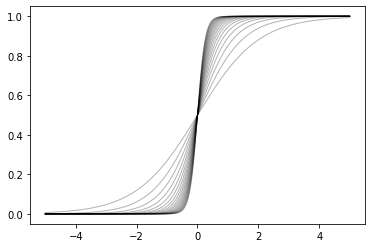

In [51]:
for r in np.linspace(1, 8, 20):
    plt.plot(ts, verhulst(ts, r=r), lw=1, c="k", alpha=0.3)

In [53]:
ax

In [55]:
type(fig)

matplotlib.figure.Figure

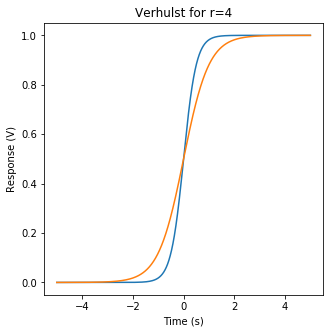

In [67]:
fig, ax = plt.subplots()
ys = verhulst(ts, r=4)
ax.plot(ts, ys)


ax.plot(ts, verhulst(ts, r=2))

ax.set_title("Verhulst for r=4")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Response (V)")

fig.set_size_inches(5, 5)
fig.savefig('verhulst.png', dpi=300)

In [69]:
line = ax.lines[0]

In [70]:
line.set_xdata(np.zeros(2001))

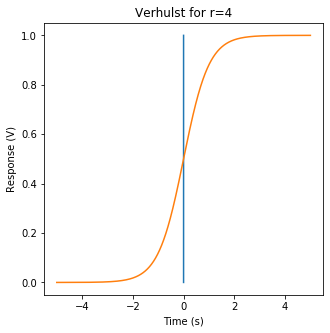

In [71]:
fig

> Exercice : lire un fichier excel avec pandas et tracer un graphe

## Récupérer des données sur le web avec requests

> Exercice : Lire, mettre en forme, sauver et représenter des données web